# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 591
['mount isa', 'nemuro', 'virudunagar', 'puerto ayora', 'port-aux-francais', 'masterton', 'bethel', 'adamstown', 'grytviken', 'tamanrasset', 'edinburgh of the seven seas', 'i-n-salah', 'selfoss', 'ushuaia', 'karratha', 'puerto natales', 'bandrele', 'stanley', 'albany', 'fale old settlement', 'mount pearl', 'maxixe', 'tyukalinsk', "kapa'a", 'san luis de la loma', "'ohonua", 'arraial do cabo', 'yellowknife', 'geraldton', 'longyearbyen', 'nuuk', 'alice springs', 'petropavlovsk-kamchatsky', 'ash shatrah', 'newnham', 'owase', 'taiohae', 'port mathurin', "nar'yan-mar", 'anadyr', 'kondoa', "mil'kovo", 'sopot', 'invercargill', 'olonkinbyen', 'miyako', 'blackmans bay', 'fort mcmurray', 'tura', 'thompson', 'igarka', 'keflavik', 'west island', 'ust-nera', "arkhangel'sk", 'ishigaki', 'punta arenas', 'abegondo', 'vilyuysk', 'baiti', 'masuguru', 'papatowai', 'lompoc', 'mirabad', 'georgetown', 'hamilton', 'tiksi', 'palu', 'tolanaro', 'bredasdorp', 'waitangi', 'weno', 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = f"{url}q={city}&appid={weather_api_key}"
    city_url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key + "&q=" + city
    #print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        #['weather'][0]['description']   per Diego, BCS assistant

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
#print(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mount isa
Processing Record 2 of Set 1 | nemuro
Processing Record 3 of Set 1 | virudunagar
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | masterton
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | tamanrasset
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | i-n-salah
Processing Record 13 of Set 1 | selfoss
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | karratha
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | bandrele
Processing Record 18 of Set 1 | stanley
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | fale old settlement
Processing Record 21 of Set 1 | mount pearl
Processing Record 22 of Set 1 | ma

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mount isa,-20.7333,139.5000,12.87,50,0,2.57,AU,1691349686
1,nemuro,43.3236,145.5750,14.48,97,100,5.10,JP,1691349686
2,virudunagar,9.6000,77.9667,30.17,52,91,3.66,IN,1691349686
3,puerto ayora,-0.7393,-90.3518,29.98,82,52,4.02,EC,1691349687
4,port-aux-francais,-49.3500,70.2167,5.19,90,100,12.24,TF,1691349401


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount isa,-20.7333,139.5000,12.87,50,0,2.57,AU,1691349686
1,nemuro,43.3236,145.5750,14.48,97,100,5.10,JP,1691349686
2,virudunagar,9.6000,77.9667,30.17,52,91,3.66,IN,1691349686
3,puerto ayora,-0.7393,-90.3518,29.98,82,52,4.02,EC,1691349687
4,port-aux-francais,-49.3500,70.2167,5.19,90,100,12.24,TF,1691349401


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

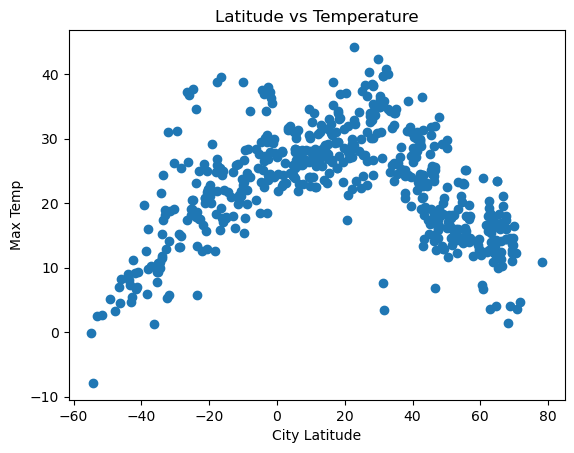

In [10]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("Latitude vs Temperature")
plt.xlabel("City Latitude")
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

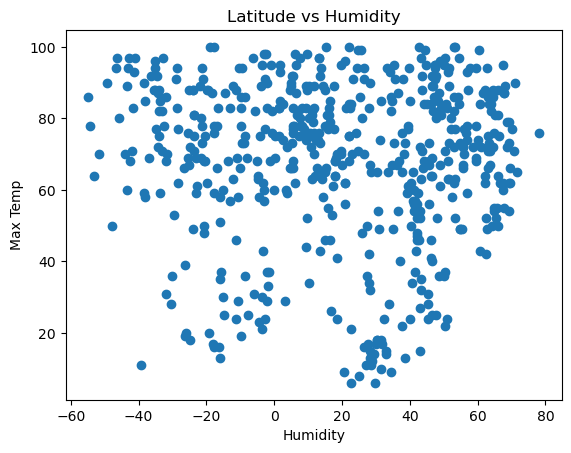

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.xlabel("Humidity")
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

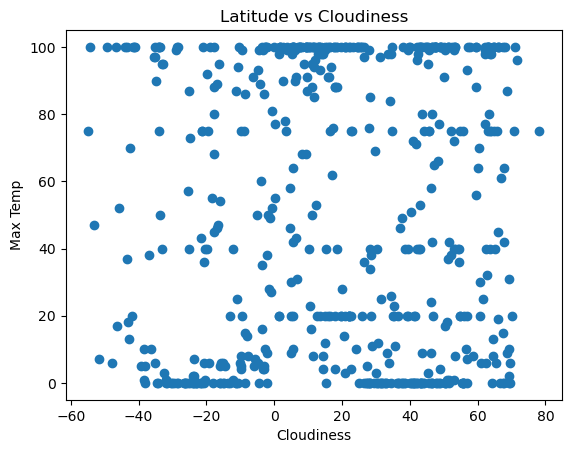

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.xlabel("Cloudiness")
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

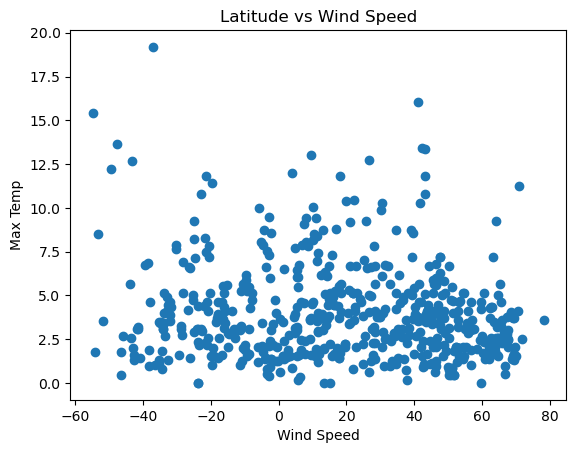

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots

### NOTE  This was built with help of Robert L, can't quite remember name, BCS Assistant

def myfunc(x_values,y_values,coord,x_label,y_label,title):
    

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    plt.annotate(line_eq,coord,fontsize=15,color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nemuro,43.3236,145.5750,14.48,97,100,5.10,JP,1691349686
2,virudunagar,9.6000,77.9667,30.17,52,91,3.66,IN,1691349686
6,bethel,41.3712,-73.4140,29.94,54,20,4.63,US,1691349541
9,tamanrasset,22.7850,5.5228,32.95,21,20,2.06,DZ,1691349688
11,i-n-salah,27.1935,2.4607,40.36,11,0,4.99,DZ,1691349689


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount isa,-20.7333,139.5000,12.87,50,0,2.57,AU,1691349686
3,puerto ayora,-0.7393,-90.3518,29.98,82,52,4.02,EC,1691349687
4,port-aux-francais,-49.3500,70.2167,5.19,90,100,12.24,TF,1691349401
5,masterton,-40.9597,175.6575,9.38,97,100,1.42,NZ,1691349687
7,adamstown,-25.0660,-130.1015,20.47,67,87,9.22,PN,1691349688


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.43021866797057695


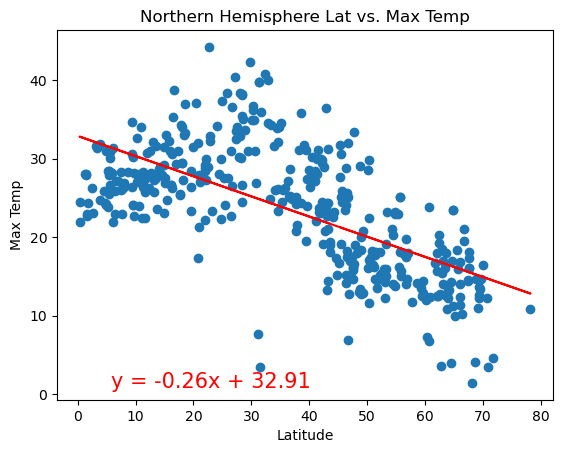

In [18]:
# Linear regression on Northern Hemisphere

# Give all variables for function in order

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
coord = (5.8,0.8)
x_latitude = "Latitude"
y_longitude = "Max Temp"
title = "Northern Hemisphere Lat vs. Max Temp"

myfunc(x_values,y_values,coord,x_latitude,y_longitude,title)


The r-squared is: 0.5480918482318943


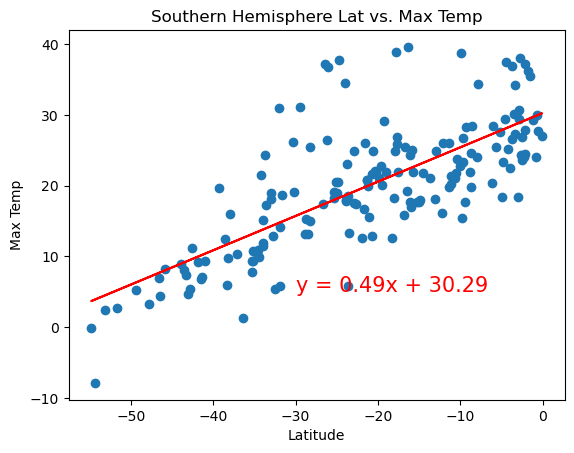

In [22]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
coord = (-30,5)
x_latitude = "Latitude"
y_longitude = "Max Temp"
title = "Southern Hemisphere Lat vs. Max Temp"

myfunc(x_values,y_values,coord,x_latitude,y_longitude,title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE
No surprise here, temperatures tend to be warmer when closer to equator, Latitude 0, and colder the farther you get from lat 0.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0004537466811875486


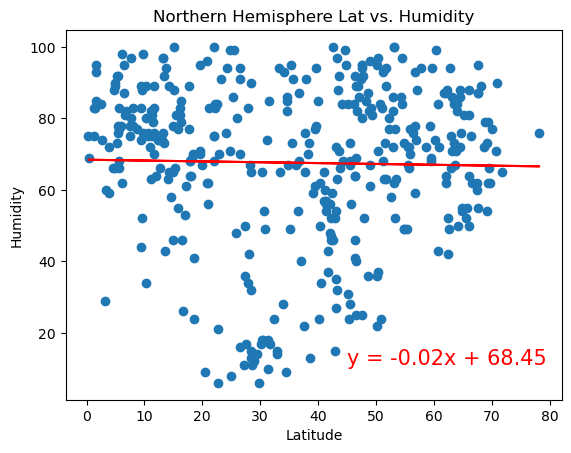

In [28]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
coord = (45,11)
x_latitude = "Latitude"
y_longitude = "Humidity"
title = "Northern Hemisphere Lat vs. Humidity"

myfunc(x_values,y_values,coord,x_latitude,y_longitude,title)

The r-squared is: 0.05209981317493962


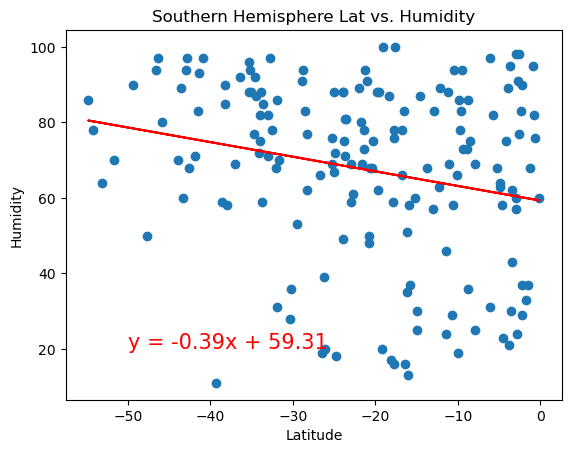

In [30]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
coord = (-50,20)
x_latitude = "Latitude"
y_longitude = "Humidity"
title = "Southern Hemisphere Lat vs. Humidity"

myfunc(x_values,y_values,coord,x_latitude,y_longitude,title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Looking at humidity vs latitude was a bit surprising, until life experience factors in. The data points are scattered far and wide, there is almost no trend, indicating that there are other forces at work in regards to humidity, such as elevation, topography, ground cover, proximity to oceans, etc, not just latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.028027935006685323


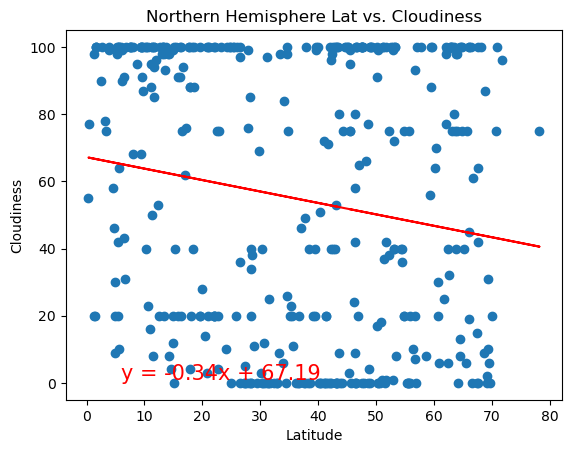

In [31]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
coord = (6,1)
x_latitude = "Latitude"
y_longitude = "Cloudiness"
title = "Northern Hemisphere Lat vs. Cloudiness"

myfunc(x_values,y_values,coord,x_latitude,y_longitude,title)

The r-squared is: 0.0019339316601812927


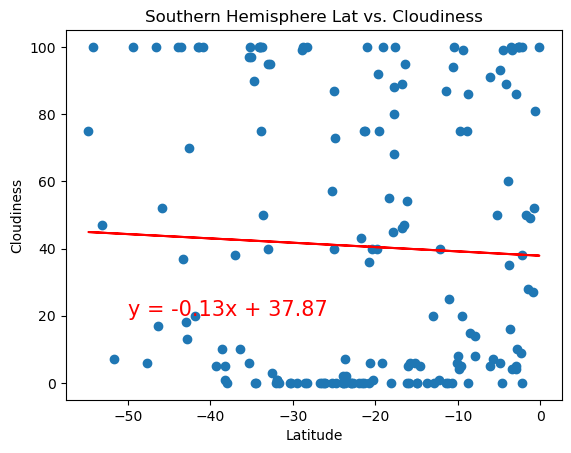

In [33]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
coord = (-50,20)
x_latitude = "Latitude"
y_longitude = "Cloudiness"
title = "Southern Hemisphere Lat vs. Cloudiness"

myfunc(x_values,y_values,coord,x_latitude,y_longitude,title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Cloudiness is interesting, because there are more data points at the extremes (either 0 or 100) than any of positions in the middle. The relatively flat line and lack of congregation around it indicate a very weak relation between cloudiness and latitude, without having other data to account.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.035241375132305616


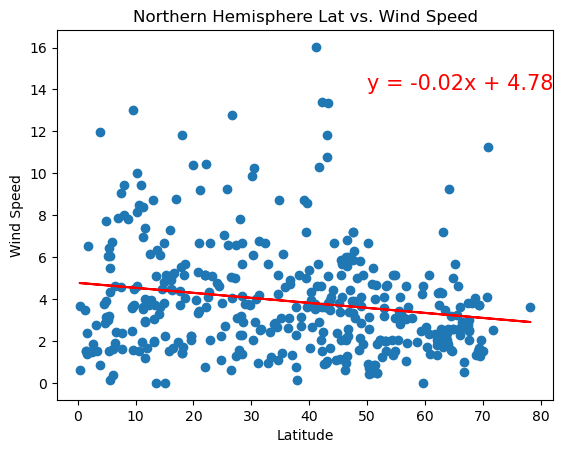

In [35]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
coord = (50,14)
x_latitude = "Latitude"
y_longitude = "Wind Speed"
title = "Northern Hemisphere Lat vs. Wind Speed"

myfunc(x_values,y_values,coord,x_latitude,y_longitude,title)

The r-squared is: 0.02252521519722664


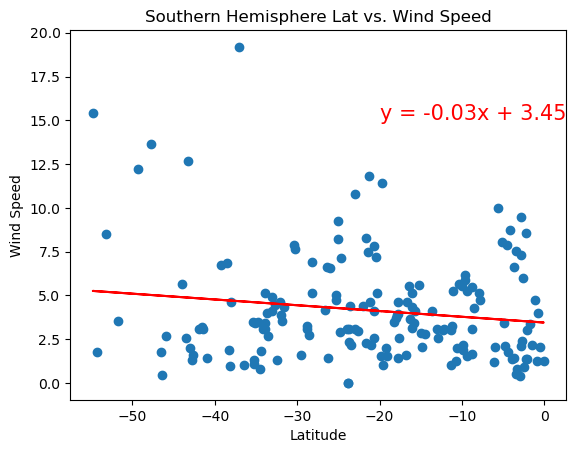

In [37]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
coord = (-20,15)
x_latitude = "Latitude"
y_longitude = "Wind Speed"
title = "Southern Hemisphere Lat vs. Wind Speed"

myfunc(x_values,y_values,coord,x_latitude,y_longitude,title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE
It seems there is a general trend of Windiness from the north pole to the south. Not straight down, of course, but it's interesting that the data does support the regression line, being clustered relationally, such that it is windier in more northern latitudes, lessening at the equator, and then continuing to lessen while moving away from the equator farther in latitude to the south.